<a href="https://colab.research.google.com/github/bartoszlibner/portfolio/blob/main/TitanicKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994
based on

In [ ]:
pd.read_csv("/content/test.csv")
pd.read_csv("/content/train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We will do logistic regression. Multiple to 2 classes. Inputs will be coming from ID

In [ ]:
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
# if you use jupyter notebook
plt.style.use('ggplot') # check for more with plt.style.available

data = load_dataset("titanic")
data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [ ]:
data_2.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


In [ ]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

In [ ]:
pd.DataFrame(data_2['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [ ]:
data_2['age'].mode()[0]

'Adult'

In [ ]:
data_4 = data_2.fillna({'age' : data_2['age'].mode()[0]})

In [ ]:
data_2['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [ ]:
data_3 = data_2.fillna({'embarked' : 'S'})

In [ ]:
data_4[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


In [ ]:
data_4[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['fare'] = pd.cut(data_4["fare"], bins = bins, labels = labels)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


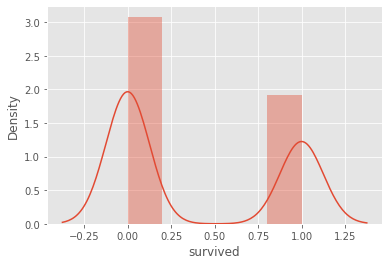

In [ ]:
data_5 = data_4.drop('class', axis=1)
sns.distplot(data_5['survived'])

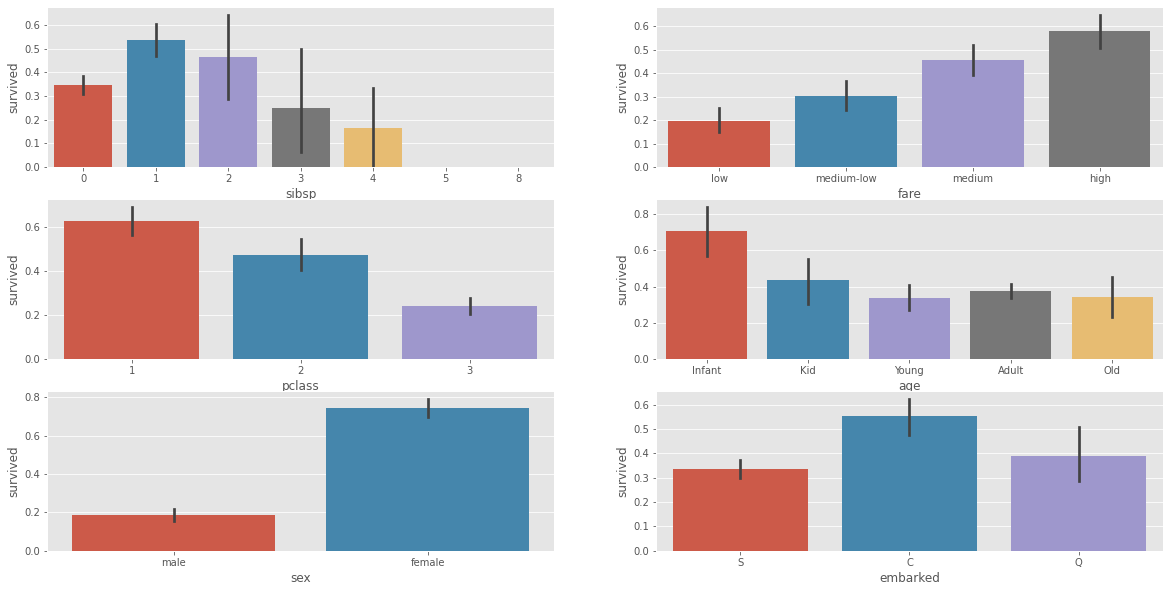

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_5);

In [ ]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_5[dummies])

,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# X contains independent values, y contains dependent value

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy_score(y_pred, y_test)

0.8067796610169492

In [ ]:
confusion_matrix(y_pred, y_test)

array([[158,  31],
       [ 26,  80]])